# EDA Part 2: Visualizations

In [118]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use('ggplot')

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# Load data
import pickle

infile = open('merged_df2.pkl', 'rb')
df = pickle.load(infile)
infile.close()

df.head()

,death,date,cdc_report_dt,onset_dt,age_group,hosp,icu,med_cond,"American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic",...,vent_incr,positive,pos_incr,pos_rate,pos_incr_rate,negative,neg_incr,recovered,tot_test_results,tot_test_results_incr
0,0,2020-04-01,2020-03-27,2020-03-27,3.0,0.0,NaN,NaN,0,0,...,NaN,224086.0,25791.0,0.180594,0.232918,984489.0,82981.0,7084.0,1240829.0,110730.0
1,0,2020-04-01,2020-03-19,2020-03-19,3.0,NaN,NaN,NaN,0,0,...,NaN,224086.0,25791.0,0.180594,0.232918,984489.0,82981.0,7084.0,1240829.0,110730.0
2,0,2020-04-01,2020-03-30,2020-03-30,3.0,0.0,NaN,NaN,0,0,...,NaN,224086.0,25791.0,0.180594,0.232918,984489.0,82981.0,7084.0,1240829.0,110730.0
3,0,2020-04-01,2020-04-01,2020-04-01,3.0,0.0,NaN,NaN,0,0,...,NaN,224086.0,25791.0,0.180594,0.232918,984489.0,82981.0,7084.0,1240829.0,110730.0
4,0,2020-04-01,2020-04-14,2020-03-31,3.0,0.0,NaN,0.0,0,0,...,NaN,224086.0,25791.0,0.180594,0.232918,984489.0,82981.0,7084.0,1240829.0,110730.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671435 entries, 0 to 671434
Data columns (total 45 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   death                                                 671435 non-null  int64         
 1   date                                                  671435 non-null  datetime64[ns]
 2   cdc_report_dt                                         671435 non-null  datetime64[ns]
 3   onset_dt                                              464801 non-null  datetime64[ns]
 4   age_group                                             671273 non-null  float64       
 5   hosp                                                  502065 non-null  float64       
 6   icu                                                   261080 non-null  float64       
 7   med_cond                                              437337 non-

In [20]:
df.columns

Index(['death', 'date', 'cdc_report_dt', 'onset_dt', 'age_group', 'hosp',
       'icu', 'med_cond', 'American Indian/Alaska Native, Non-Hispanic',
       'Asian, Non-Hispanic', 'Black, Non-Hispanic', 'Hispanic/Latino',
       'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'White, Non-Hispanic', 'Female', 'Male', 'Other', 'month',
       'onset_pos_lag', 'pos_onset_lag', 'cdc_pos_lag', 'pos_cdc_lag',
       'onset_cdc_lag', 'cdc_onset_lag', 'beds_occ', 'calc_pct_occ',
       'avg_pct_occ', 'deaths_tot', 'death_incr', 'hosp_cum', 'hosp_incr',
       'icu_cum', 'icu_incr', 'vent_cum', 'vent_incr', 'positive', 'pos_incr',
       'pos_rate', 'pos_incr_rate', 'negative', 'neg_incr', 'recovered',
       'tot_test_results', 'tot_test_results_incr'],
      dtype='object')

In [21]:
# Rearrange columns and remove columns I don't need
df = df[['death', 'age_group', 'hosp',
       'icu', 'med_cond', 'American Indian/Alaska Native, Non-Hispanic',
       'Asian, Non-Hispanic', 'Black, Non-Hispanic', 'Hispanic/Latino',
       'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'White, Non-Hispanic', 'Female', 'Male', 'Other', 'month',
       'onset_pos_lag', 'pos_onset_lag', 'cdc_pos_lag', 'pos_cdc_lag',
       'onset_cdc_lag', 'cdc_onset_lag', 'beds_occ', 'calc_pct_occ',
       'avg_pct_occ', 'deaths_tot', 'death_incr', 'hosp_cum', 'hosp_incr',
       'icu_cum', 'icu_incr', 'vent_cum', 'vent_incr', 'positive', 'pos_incr',
       'pos_rate', 'pos_incr_rate', 'negative', 'neg_incr', 'recovered',
       'tot_test_results', 'tot_test_results_incr']]

## Exploratory data analysis

Let's start by looking at the correlations between the target variable and my features.

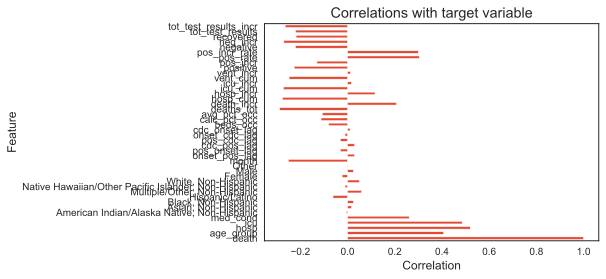

In [25]:
# Look at correlations
corr = df.corr()['death']

corr.plot(kind='barh')
plt.figure(figsize=(12,8))
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlations with target variable', fontsize=14;

There are many interesting observations here!

Looking at the national data, some of these correlations are unexpected. Death appears to be negatively correlated with the total number of positive tests, the day-to-day increase in positive tests, the total number of patients in the hospital, the total number of patients in the ICU, the total number of patients on ventilator support, relative hospital occupancy by COVID patients, and very interestingly, the total number of deaths!
However, some of these correlations definitely make sense- death is negatively correlated with the number of negative tests, day-to-day increases in the nubmer of negative tests, number of people who recovered and is positively correlated with the positivity rate (total # of positive cases/total # of tests), the day-to-day increase in the positive rate, the day-to-day increase in the number of hospitalizations, the day-to-day increase in the number of deaths.

Death appears to be negatively correlated with time. However, this feature is tricky in that it is also correlated with a host of other factors and is difficult to interpret directly.

Now to look at patient-level factors: death appears to be positively correlated with ICU admission, hospitalization, the presence of an underlying medical condition, age, male sex, Black race, and Asian race. Most of these correlations make sense and concord with the data published so far. Interestingly, death appears to be positively correlated with the absence of symptoms.

It's difficult to explain some of these correlations without digging in (much) deeper. Particularly in regard to the national data, it could be that these events that are unexpectedly negatively correlated are relatively much more common compared to the event of death. In particular, many more patients are positive . In addition, it is important to note that many of these correlations are small in magnitude. I'm interested to see how important these variables are through modeling.

I will now use data visualization to corroborate some of my preliminary findings regarding features and to gain additional insight about my data in preparation for modeling.

In [106]:
# List out columns
df.columns

Index(['death', 'cdc_report_dt', 'date', 'onset_dt', 'age_group', 'hosp',
       'icu', 'med_cond', 'American Indian/Alaska Native, Non-Hispanic',
       'Asian, Non-Hispanic', 'Black, Non-Hispanic', 'Hispanic/Latino',
       'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'White, Non-Hispanic', 'Female', 'Male', 'Other', 'month',
       'onset_pos_lag', 'pos_onset_lag', 'cdc_pos_lag', 'pos_cdc_lag',
       'onset_cdc_lag', 'cdc_onset_lag', 'no_sx', 'beds_occ', 'calc_pct_occ',
       'avg_pct_occ', 'deaths_tot', 'death_incr', 'hosp_cum', 'hosp_incr',
       'icu_cum', 'icu_incr', 'vent_cum', 'vent_incr', 'positive', 'pos_incr',
       'pos_rate', 'pos_incr_rate', 'negative', 'neg_incr', 'recovered',
       'states', 'tot_test_results', 'tot_test_results_incr'],
      dtype='object')

*Distribution of target variable*

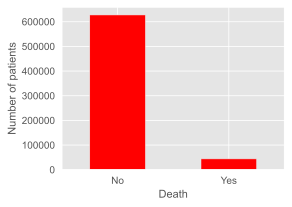

In [142]:
plt.figure(figsize=(4,3))
df['death'].value_counts().plot(kind='bar', color='r')
plt.xlabel('Death', fontsize=11)
plt.ylabel('Number of patients', fontsize=11)
plt.xticks([0,1], ['No', 'Yes'], fontsize=10, rotation=0)
plt.yticks(fontsize=10);

Note the class imbalance (~14:1). Practically speaking, this is a good thing as it is fortunate that there are many more individuals who survive COVID-19 than not.

*Patient-level features*

Features related to the individual patient seemed to have the highest correlation with the target.

In [32]:
# Features to explore: age group, sex, presence of underlying medical condition, race/ethnicity
# Create dictionary for plotting
pt_feat = {'Age Group': 'age_group',
          'Presence of Underlying Medical Condition': 'med_cond',
          'Hospitalization Status': 'hosp',
          'ICU Admission': 'icu',
          'Asian Race/Ethnicity': 'Asian, Non-Hispanic',
          'Black Race/Ethnicity': 'Black, Non-Hispanic',
          'Hispanic/Latino Race/Ethnicity': 'Hispanic/Latino',
          'White race/Ethnicity': 'White, Non-Hispanic',
          'Female sex': 'Female',
          'Male sex': 'Male'}

In [29]:
# Group sex and race
sex = ['Female', 'Male', 'Other']
race = ['American Indian/Alaska Native, Non-Hispanic', 'Asian, Non-Hispanic',
           'Black, Non-Hispanic', 'Hispanic/Latino', 'Multiple/Other, Non-Hispanic',
           'Native Hawaiian/Other Pacific Islander, Non-Hispanic', 'White, Non-Hispanic']

In [30]:
# Function to plot features
def plot_pt_feat(feature, col_name):
    if col_name == 'age_group':
        plt.figure(figsize=(5,4))
        sns.countplot(x='death', hue=col_name, data=df)
        plt.xlabel('Death', fontsize=10)
        plt.xticks([0,1], ['No', 'Yes'], fontsize=9)
        plt.ylabel('# of patients who died', fontsize=10)
        plt.yticks(fontsize`=9)
        plt.title('Death status by {}'.format(feature), fontsize=12)
        plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=8,
                   labels=['0-9 years', '10-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years',
                   '60-69 years', '70-79 years', '80+ years'])
        plt.show()
    else:
        plt.figure(figsize=(5,4))
        sns.countplot(x='death', hue=col_name, data=df)
        plt.xlabel('Death', fontsize=10)
        plt.xticks([0,1], ['No', 'Yes'], fontsize=9)
        plt.ylabel('# of patients who died', fontsize=10)
        plt.yticks(fontsize=9)
        plt.title('Death status by {}'.format(feature), fontsize=12)
        plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=8)
        plt.show()

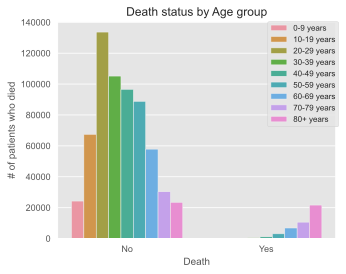

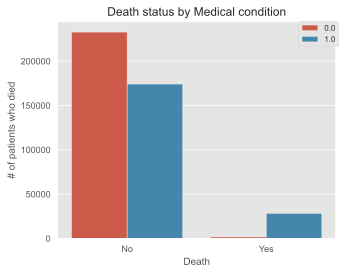

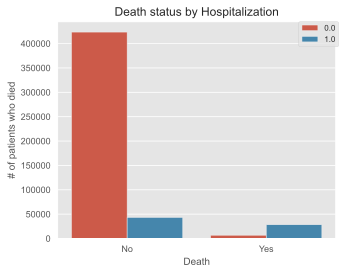

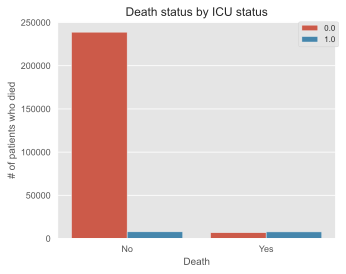

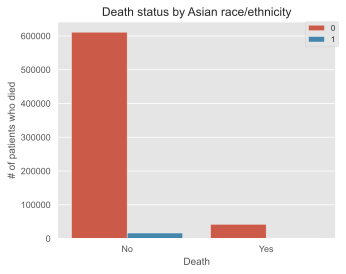

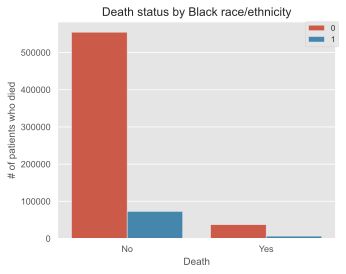

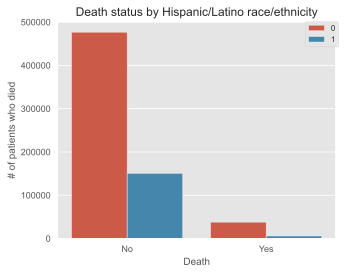

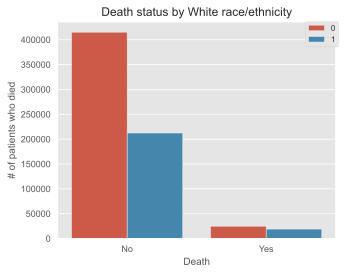

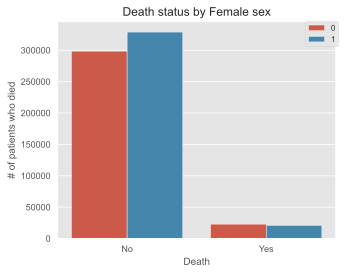

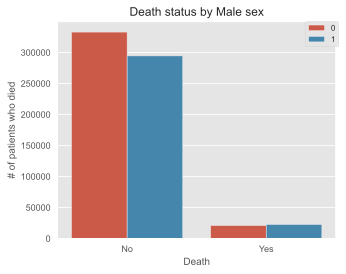

In [143]:
for feature, col_name in pt_feat.items():
    plot_pt_feat(feature, col_name)

We can see which features are correlated with our target variable clearly from these bar charts. With certain features, we notice a reversal of the distribution within each target class, indicating a stronger correlation with death, and these will be worth looking at in my models.

*National-level features*

I also want to explore whether or not there may be some relationship between the individual risk of death from COVID-19 and the overall trend of the disease.

In [108]:
# Features to explore: 
nat_feat = ['beds_occ', 'calc_pct_occ', 'avg_pct_occ', 'deaths_tot', 'death_incr', 'hosp_cum', 'hosp_incr',
            'icu_cum', 'icu_incr', 'vent_cum', 'vent_incr', 'positive', 'pos_incr', 'pos_rate', 'pos_incr_rate',
            'negative', 'neg_incr', 'recovered', 'tot_test_results', 'tot_test_results_incr']

*Time*

I want to look at the potential effects of time from various angles, such as the time period of the illness and death, the durations between key time points such as the onset of illness, date of the positive test, etc. I will plot correlations.

In [34]:
# Features to explore
time_feat = ['month', 'onset_pos_lag', 'pos_onset_lag', 'cdc_pos_lag', 'pos_cdc_lag',
             'onset_cdc_lag', 'cdc_onset_lag']

In [35]:
# Group df by target class and look at distributions of duration features within each class and compare
df_target_0 = df[df['death'] == 0]
df_target_1 = df[df['death'] == 1]

In [36]:
# Function to plot distributions within target classes
def plot_dist(feat):
    plt.figure(figsize=(8,4))
    
    # Within negative class
    plt.subplot
    plt.hist(df_target_0[feat], bins=100, color='b')
    plt.yticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title('Distribution of {} among patients who did not die'.format(feat), fontsize=12)
    plt.show()
    
    # Within positive class
    plt.figure(figsize=(8,4))
    plt.hist(df_target_1[feat], bins=100, color='r')
    plt.yticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title('Distribution of {} among patients who died'.format(feat), fontsize=12)
    plt.show()

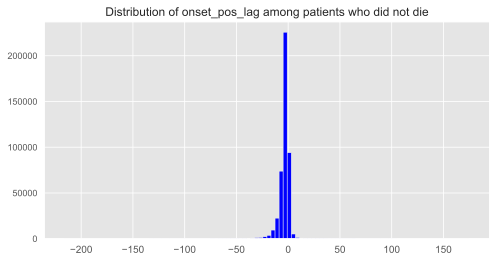

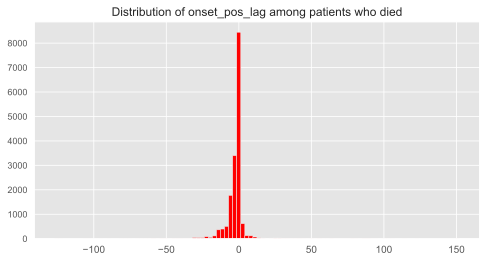

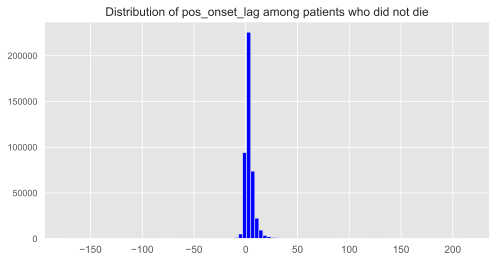

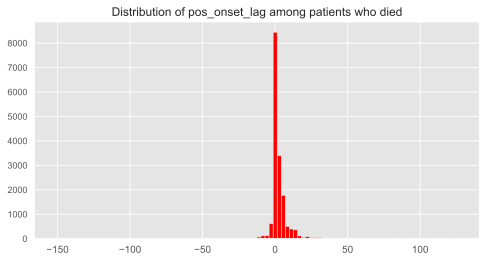

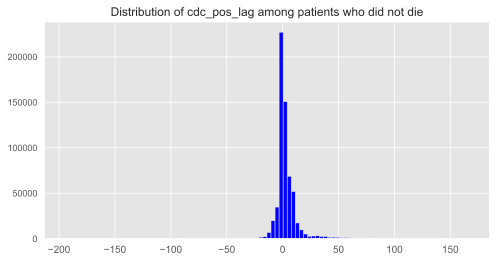

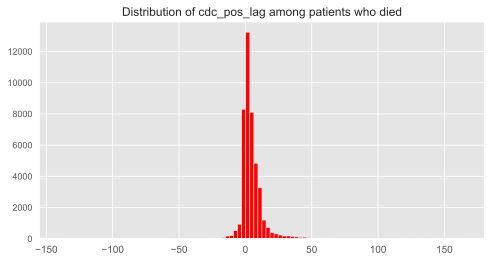

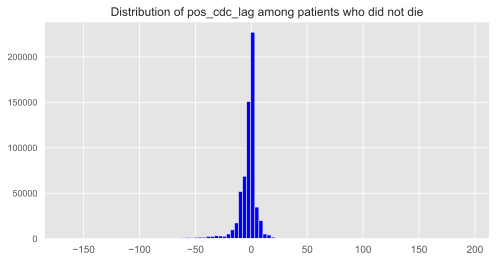

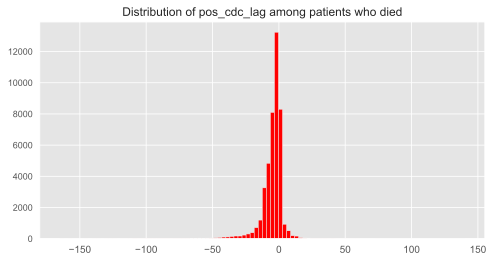

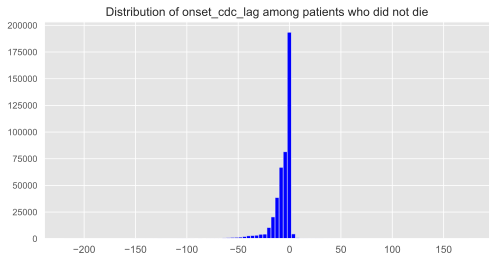

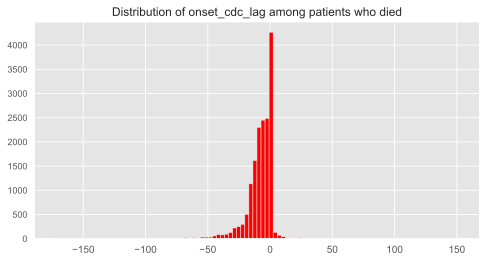

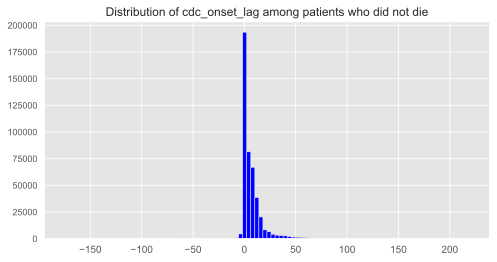

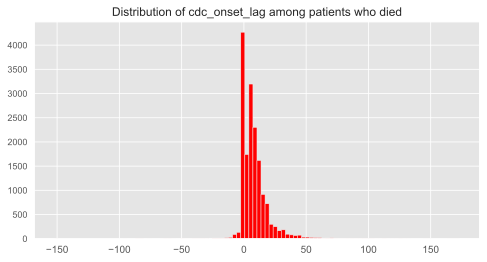

In [144]:
for feat in time_feat[1:]:
    plot_dist(feat)

These distributions appear fairly similar between the two classes.

In [38]:
# Number of deaths by month/over time
# Create dataframes
avgs = ['calc_pct_occ', 'deaths_tot', 'death_incr', 'hosp_cum', 'hosp_incr',
            'icu_cum', 'icu_incr', 'vent_cum', 'vent_incr', 'positive', 'pos_incr', 'pos_rate', 'pos_incr_rate',
            'negative', 'neg_incr', 'recovered']

df_month_target = df.groupby('month').sum()['death'].reset_index()
df_month_avgs = df.groupby('month').mean()[avgs].reset_index()

df_month_target
df_month_avgs

,month,death
0,4,27198
1,5,7120
2,6,2498
3,7,3519
4,8,2932
5,9,590


,month,calc_pct_occ,deaths_tot,death_incr,hosp_cum,hosp_incr,icu_cum,icu_incr,vent_cum,vent_incr,positive,pos_incr,pos_rate,pos_incr_rate,negative,neg_incr,recovered
0,4,0.087470,31337.823301,1864.565611,80595.700795,3343.721758,1893.698473,142.731151,189.809979,17.155972,6.550158e+05,29202.518649,0.184482,0.173966,2.875651e+06,145762.357946,6.042392e+04
1,5,0.068799,81871.926945,1410.553159,167102.183382,3251.777676,6516.812262,183.997649,562.019954,11.350495,1.438039e+06,23388.400384,0.133495,0.070217,9.563935e+06,318973.946668,2.774723e+05
2,6,0.047374,112555.304834,655.245655,228699.095015,1211.674618,9687.894602,79.019964,862.586891,10.548297,2.202899e+06,29491.927534,0.086585,0.054335,2.314308e+07,490643.180668,6.841065e+05
3,7,7.645088,130999.143307,843.770339,271876.396002,2177.394314,12175.265361,114.715926,1197.927318,14.981012,3.562998e+06,61627.308528,0.079876,0.080351,4.014218e+07,677949.162301,1.103735e+06
4,8,47.815454,161882.719383,993.141526,345846.158668,2128.023923,15968.422671,118.944715,1674.698911,16.138373,5.359288e+06,46484.040507,0.077691,0.063199,6.194693e+07,667698.929807,1.845279e+06
5,9,56.504568,181888.859936,866.929910,380220.145272,1389.977676,18227.224559,96.010726,1979.997948,14.042499,6.282738e+06,37211.186764,0.073427,0.051302,7.664619e+07,634577.712303,2.347296e+06


In [42]:
# Function to plot correlations
def plot_time_corr(feat, df):
    plt.figure(figsize=(5,4))
    plt.plot(df['month'], df[feat], marker='o')
    plt.xlabel('Month', fontsize=10)
    plt.xticks(list(range(4,10)), ['Apr', 'May', 'Jun', 'July', 'Aug', 'Sept'], fontsize=9)
    plt.ylabel('Total', fontsize=10)
    plt.yticks(fontsize=9)
    plt.title('{} over time'.format(feat), fontsize=12)
    plt.show()

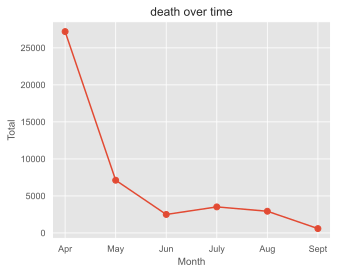

In [145]:
plot_time_corr('death', df_month_target)

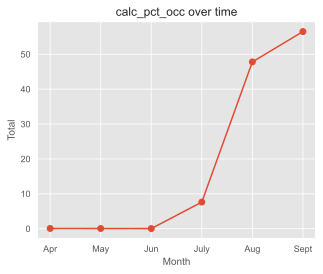

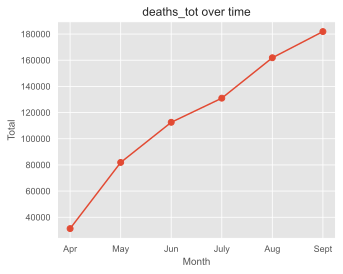

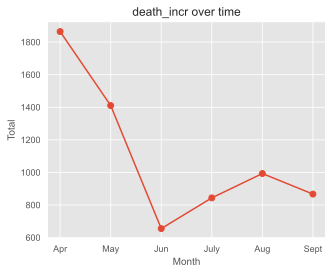

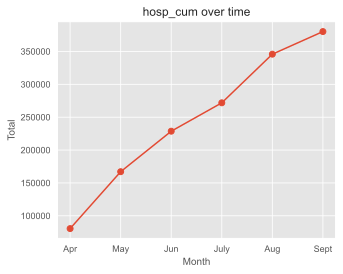

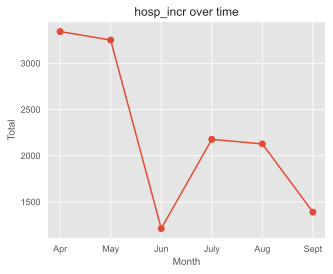

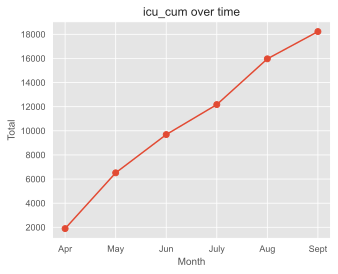

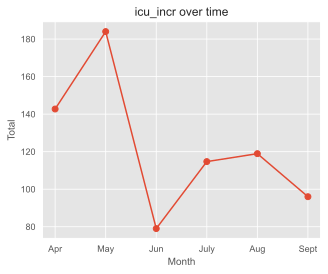

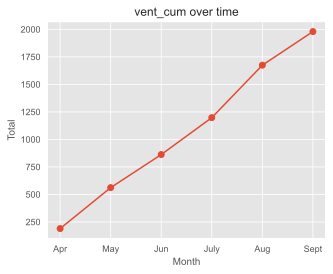

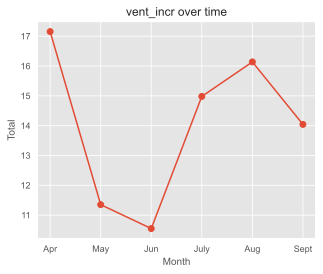

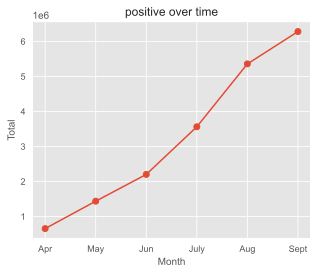

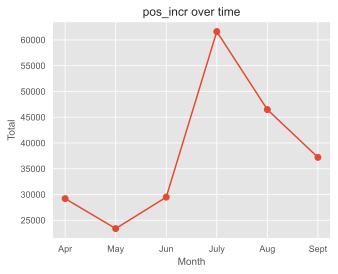

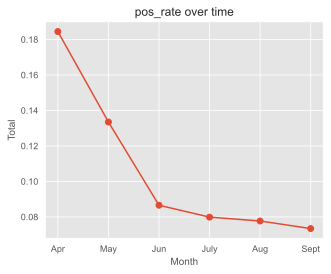

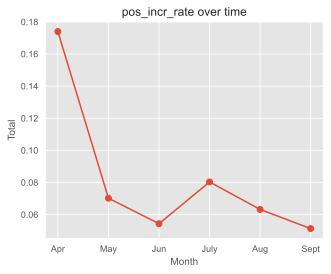

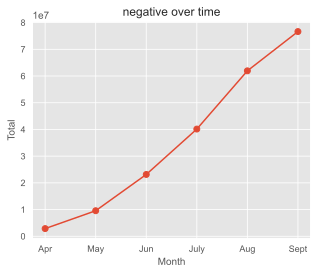

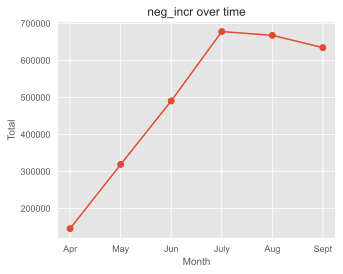

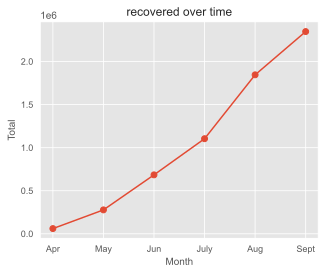

In [146]:
for feat in avgs:
    plot_time_corr(feat, df_month_avgs)

Interestingly, the number of deaths recorded in my patient-level database is highest in April and decreases noticeably afterwards while the national trend progressively increases over time. This may be secondary to data collection rather than reflecting an actual trend.